<a href="https://colab.research.google.com/github/r-meleshko/kaggle/blob/main/data_science_bowl_2018_Image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

In [2]:
import os
import time
import zipfile
from pathlib import Path

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import files

uploaded = files.upload()

!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


## Load data

In [4]:
!kaggle competitions download -c data-science-bowl-2018
!unzip -q data-science-bowl-2018.zip
!rm data-science-bowl-2018.zip

# Unzip all into folders with same name
def unzip_all_zips(directory):
    for file in os.listdir(directory):
        if file.endswith('.zip'):
            zip_path = os.path.join(directory, file)
            folder_name = os.path.splitext(file)[0]
            folder_path = os.path.join(directory, folder_name)

            # Create the folder if it doesn't exist
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)

            # Unzip the file into the folder
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(folder_path)
                os.remove(zip_path)


# Replace 'path_to_directory' with the path to your target directory
unzip_all_zips('.')

!ls

 99% 354M/358M [00:05<00:00, 78.9MB/s]
100% 358M/358M [00:05<00:00, 70.6MB/s]
sample_data		      stage1_train
stage1_sample_submission.csv  stage1_train_labels.csv
stage1_solution.csv	      stage2_sample_submission_final.csv
stage1_test		      stage2_test_final


## Explore images, masks and labels

In [6]:
labels = pd.read_csv("stage1_train_labels.csv/stage1_train_labels.csv")
print(labels.shape[0])
labels.head(1)

29461


,ImageId,EncodedPixels
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...


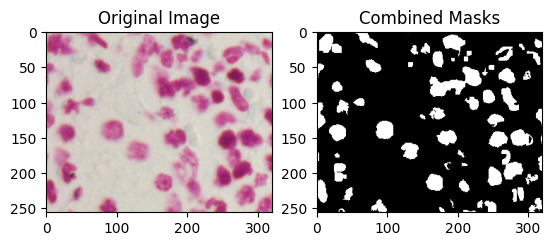

In [34]:
id = labels.drop_duplicates(subset="ImageId").iloc[3, 0]

# Read the image
image_path = f'stage1_train/{id}/images/{id}.png'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Read and combine associated masks
mask_folder = f'stage1_train/{id}/masks'
mask_files = os.listdir(mask_folder)
combined_mask = None
for mask_file in mask_files:
    mask = cv2.imread(os.path.join(mask_folder, mask_file))
    if combined_mask is None:
        combined_mask = mask
    else:
        combined_mask += mask

# Plot the image and combined masks
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(combined_mask)
plt.title('Combined Masks')
plt.show()